Below cell contains starter code to generate the initial centers.
Please do not change anything apart from the student ID.
The initial centers will be in a dictionary with keys being 'k' and value being the centers.

In [629]:
from precode import * 
import matplotlib.pyplot as plt
data = np.load('AllSamples.npy')
initial_centers = {}

for k in range(2, 11):
    centers = initial_S2("1391", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers 
print(initial_centers)
#enter your last 4 digits of student id instead of 0000

{2: array([3.81135136, 5.98125361]), 3: array([6.39627447, 1.24125663]), 4: array([2.16641743, 2.99414637]), 5: array([2.37650624, 8.15241778]), 6: array([2.06136024, 3.54047797]), 7: array([7.44472802, 2.41849318]), 8: array([4.9511002 , 8.08344216]), 9: array([5.74511019, 5.32034026]), 10: array([7.80003043, 1.90963115])}


Print the last 4 digits of your student id as string in the cell
below. Please make sure to only have one print statement in the cell below.

In [630]:
### TEST FUNCTION: test_print_id
# DO NOT REMOVE THE LINE ABOVE
print('1391') #add your ID again here
#print(initial_centers[2])
print(np.argwhere(initial_centers[2] == data))
print(data[19])
print(initial_centers[2])

1391
[[19  0]
 [19  1]]
[3.81135136 5.98125361]
[3.81135136 5.98125361]


Add your code for computing the kMeans final centroids and loss functions in the code block below.

In [631]:
# test = np.array([[1,2,3,4,5,6,7,8,9]])
# #print(np.mean(test, axis=0))
# for k, centroids in initial_centers.items():
#     all_centroids = []
#     datapoint_to_centroids_distances = []
#     #centroids_found = np.array(centroids).reshape(1,2)
#     centroids_found = [centroids]
#     #print(centroids_found)
#     # centroids_found.append([4.3333, 5.6666])
#     # print(centroids)
#     # print(centroids_found)
#     #for i in range(k-1): 
#     for x in data:
#         if len(centroids_found) > 1:
#             euclidean_distance = np.sqrt(np.sum((x - centroids_found)**2, axis=1))
#         else: euclidean_distance = np.sqrt(np.sum((x - centroids_found)**2))
#         datapoint_to_centroids_distances.append(euclidean_distance)
#     next_centroid = np.argmax(np.mean([datapoint_to_centroids_distances], axis=0))
#     centroids_found.append(data[next_centroid])
#     #np.append(centroids_found,[data[next_centroid]], axis=0)
#     print(centroids_found)
#     # print(centroids_found)
#        # initial_centers[k] = data[next_centroid == i]
#     #print(centroids_found)
#     #print(datapoint_to_centroids_distances)
    
#     # plt.scatter(centroids_found[0][0], centroids_found[0][1],s=100, color="black")
#     # plt.scatter(centroids_found[1][0], centroids_found[1][1],s=100, color="green")
#     # plt.scatter([x[0] for x in data], [x[1] for x in data], color = "red")
#     # plt.show()
initial_centroids = dict(initial_centers)

# K-means++ initialization -> initialize the remaining k-1 centroids for each k value
for k, centroid in initial_centers.items():
    
    centroids = [centroid]
    
    for _ in range(1, k):
        distances = []
        
        # calculate distances from each point to all previously selected centroids
        for x in data:
            euclidean_distance = np.mean(np.sqrt(np.sum((x - centroids)**2, axis = 1)))
            distances.append(euclidean_distance)
        distances = np.array(distances)
        
        # set distances to -1 for points already in centroids. This prevents duplication of centroids
        for centroid in centroids:
            distances[np.all(data == centroid, axis=1)] = -1
            
        # select the point with the maximum average distance 
        next_centroid_index = np.argmax(distances)
        
        # add the selected point to the centroids list
        centroids.append(data[next_centroid_index])
    initial_centroids[k] = np.array(centroids)


final_centroids = {}
cluster_datapoints = {}
losses = {}

# K-means clustering
for k in initial_centroids.keys():
    
    centroids = initial_centroids[k]
    
    for i in range(100):
        min_distance_index = []
        classified_cluster_datapoints = []
        datapoint_to_centroids_distances = []
        
        for x in data:
            #calculate the distance from one datapoint (x) to all centroids (centroids array)
            euclidean_distance = np.sqrt(np.sum((x - centroids)**2, axis=1))
            datapoint_to_centroids_distances.append(euclidean_distance)
            
        #get the index of the smallest distance value among all the calcualted distances from one datapoint to all centroids
        min_distance_index = np.argmin(datapoint_to_centroids_distances, axis=1)
        
        for i in range(k):
            # assign each datapoint to its nearest centroid. classified_cluster_datapoints is an array of clusters, each cluster is an array of datapoints
            classified_cluster_datapoints.append(data[min_distance_index==i])

        # determine the new centroids based on the mean of each group of classified datapoints
        updated_centroids = [np.mean(classified_cluster_datapoints[i], axis=0) for i in range(k)]
        if np.all(np.absolute(np.array(centroids) - np.array(updated_centroids)) < 0.00005):
            break
        centroids = updated_centroids
        
    # store the final centroids for each k clusters value    
    final_centroids[k] = centroids
    # store the final clusters for each k clusters value
    cluster_datapoints[k] = classified_cluster_datapoints
    
    # calculate the loss for each k clusters value
    losses[k] = np.sum([np.sum((classified_cluster_datapoints[i] - updated_centroids[i])**2) for i in range(len(updated_centroids))])

Please use the following cell to print all the final 
centeriods for k in the range of 2 to 10, both inclusive.

Notes:
The centeriods should have the following format: 
[[x1,y1],[x2,y2],[x3,y3]][[x_1,y_1],[x_2,y_2],[x_3,y_3]]

The order of the centeriod does not matter 
but do NOT change the order for x and y coordinate.

Please print the centroids from k=2 to k=10 in order and each on a new line.
Do not print anything else in the code cell below.

Example:  
[[x1, y1], [x2, y2]]

[[x1, y1], [x2, y2], [x3, y3]]

 .

 .
 
 .

 [[x1,y1]..[x9,y9]]

In [632]:
### TEST FUNCTION: test_project2_part2_1cen
# DO NOT REMOVE THE LINE ABOVE
for k,centroids in final_centroids.items():
    c = [list(i) for i in centroids]
    print(c)

[[4.852611930287174, 7.271641711202775], [5.000562341588762, 2.4854274751531933]]
[[5.477400388679034, 2.254981027984723], [2.5614644894663545, 6.088613382895479], [6.497249620849709, 7.522972929895171]]
[[3.339957483138508, 2.5921522375769444], [6.603458393504191, 7.570421042158782], [7.380762638700798, 2.332455315679148], [2.8585923471789103, 6.931365250947319]]
[[2.601232962568677, 6.91610505751996], [3.2125746077046626, 2.496580865799525], [7.756483249146484, 8.556689279063415], [7.252626831256577, 2.4001582635520533], [5.402525077573915, 6.736361752187993]]
[[3.4955665791995627, 3.5661123157286907], [7.756483249146484, 8.556689279063415], [3.145061482959145, 0.9077065486588153], [2.5633381461259046, 6.978224800606624], [7.414192434680615, 2.3216911383868664], [5.464277356727894, 6.837713536435891]]
[[7.556167822397726, 2.235167959857534], [2.5633381461259046, 6.978224800606624], [3.1690614508664035, 0.8143251472991676], [7.756483249146484, 8.556689279063415], [4.8681371322300135, 

Please use the following cell to print all the final loss functions for k in the range of 2 to 10, both inclusive.

Notes:
Print the loss functions for every value of k in a new line and in order.
Do not print anything else in the code cell below.

Example: 

L1 

L2 

L3 

.

.

.

L9

In [633]:
### TEST FUNCTION: test_project2_part2_loss
# DO NOT REMOVE THE LINE ABOVE
for k,loss in losses.items():
    print(loss)

1921.0334858562062
1293.7774523911348
788.269349006556
613.2824392056042
476.11875167635293
367.6658464946495
404.12682136949945
273.5730987887718
214.99427232544488


**This part of the project is manually graded.**

Please print your plots in the next few cells.


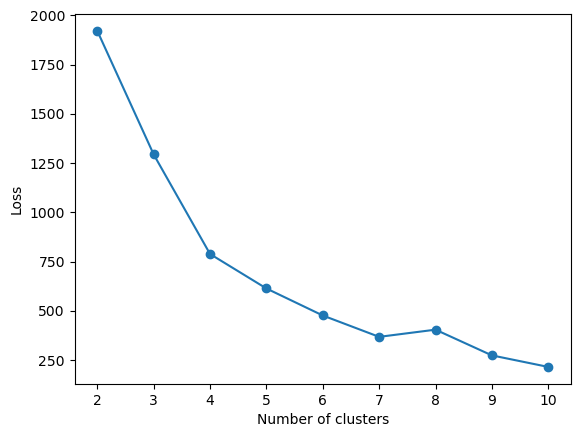

In [634]:
cluster_num = [k for k in initial_centers.keys()]
plt.plot(cluster_num, losses.values(), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Loss")
plt.show()

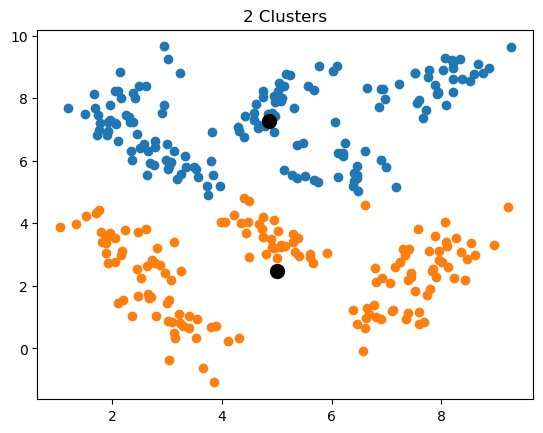

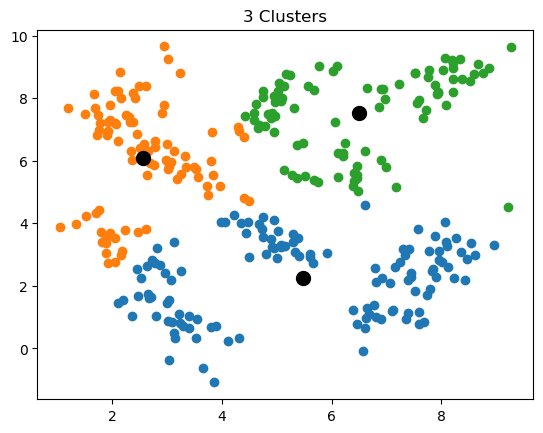

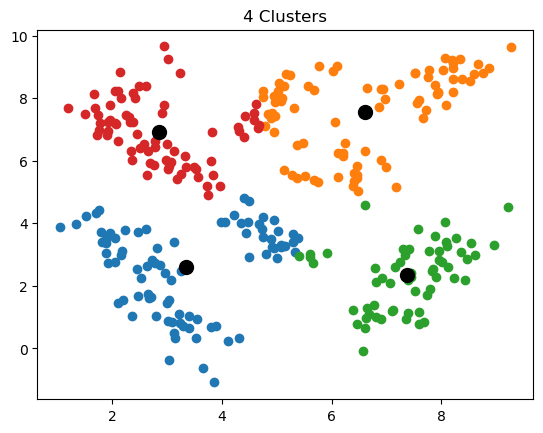

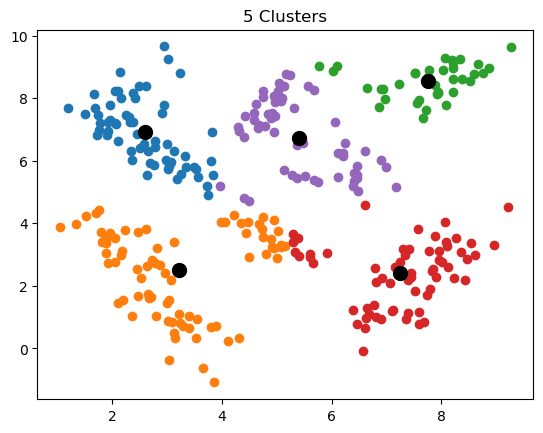

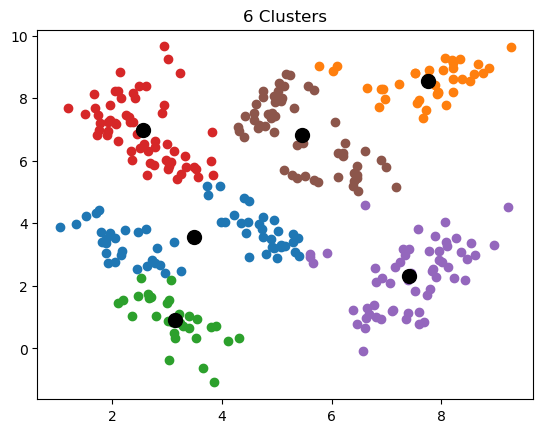

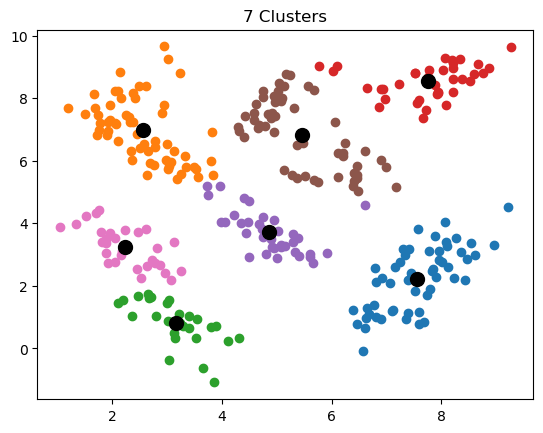

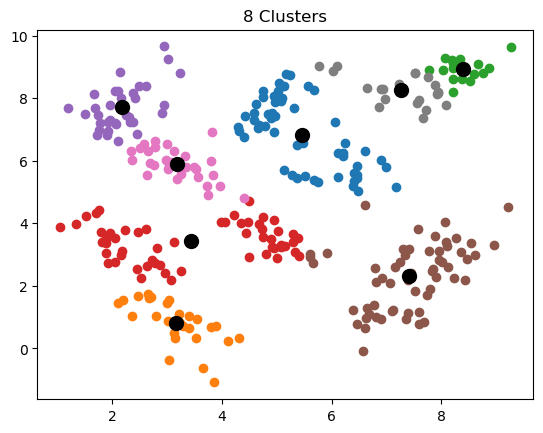

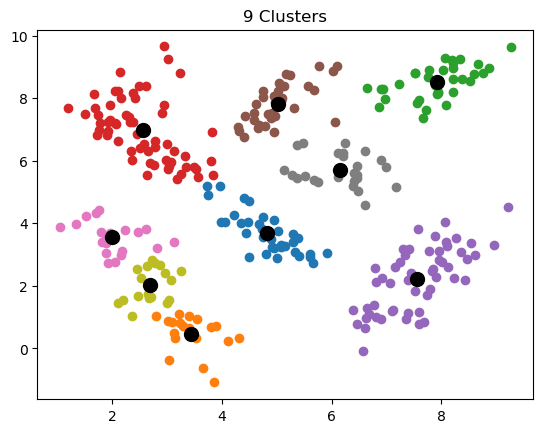

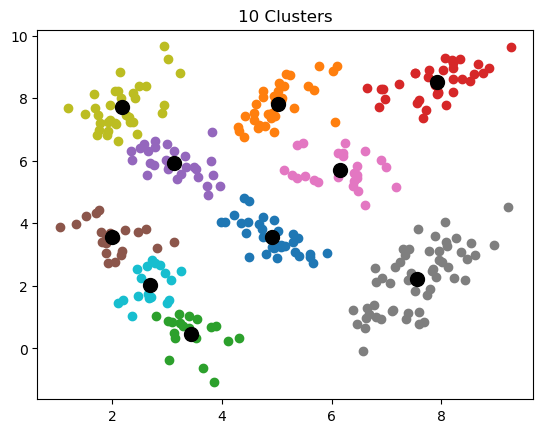

In [635]:
for  k in final_centroids.keys():
    for cluster in cluster_datapoints[k]:
        x = [i[0] for i in cluster]
        y = [i[1] for i in cluster]
        plt.scatter(x,y)
    
    cx = [i[0] for i in final_centroids[k]]
    cy = [i[1] for i in final_centroids[k]]
    plt.scatter(cx,cy, s=100, color="black")
    plt.title(label=(str(k)+' Clusters'))
    plt.show()